___
# **MUSHROOM DATASET**
___


In [5]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


___
## Information about the data:
___
Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

___
## Importing project dependencies
___

In [6]:
# import project dependencies

# processing libraries
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn  as sns
from mpl_toolkits.mplot3d import Axes3D

# mpl extras
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
plt.style.use('dark_background')

# math n statistic library
from scipy import stats

# to read matplotlib inline
%matplotlib inline

# for string operatoions
import re

___
##  Importing the data and making it ready for Analysis
___

In [7]:
col_names = ["Class","cap-shape","cap-surface","cap-color","bruises","odor","gill-attachment","gill-spacing","gill-size","gill-color","stalk-shape","stalk-root","stalk-surface-above-ring","stalk-surface-below-ring","stalk-color-above-ring","stalk-color-below-ring","veil-type","veil-color","ring-number","ring-type","spore-print-color","population","habitat"]

In [8]:
col_names

['Class',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [9]:
df = pd.read_csv('agaricus-lepiota.data',names=col_names)

In [10]:
df.head()

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## There are only categorical values in the Dataset

In [11]:
df.describe()

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [12]:
df.isna().sum()

Class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

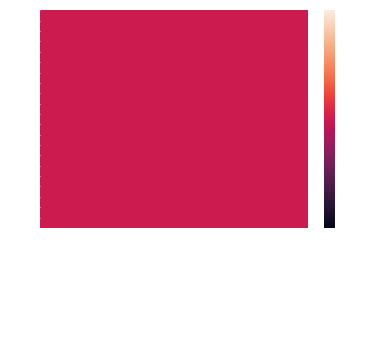

In [13]:
# a heat map for cinfimation of no missing values present
sns.heatmap(df.isna())

### Inference on eyeballing the dataset
*  We have 23 Columns in the dataset out of which `22` are the `features`(independeable variables) and `1` is the `target`(dependent variable)
*  There are 8124 obsevrvation in the dataset
# *  There is no missing data in the dataset
* The dataset is a classification type dataset as there is a class to be determined(e-edible or p-posionous)
* `Every feature` in the dataset is an `nominal categorical feature` 
* So the 2 encoding techniques we will using are Binary encoding and Label Encoding
* The column `veil-type` just has a single value all over the dataset i.e. `p` ,thus the column is preferred to be dropped

___
## EDA
___

### Univariate Analysis

In [14]:
df.head()

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [15]:
# The below code print show if there are values appart 

dirty_columns = set()
miss_count = 0
unique_set = set()
element_count = 0
unwanted_characters = set()
string_compiler = re.compile('[^a-z]')       # set a compiler to get every value other than [a-z]

for col_name in df:                          # iterate through columns
  for obs in enumerate(df[col_name]):        # iterate through instances of every column

    unique_set.add(obs[1])                   # add every unique instance of the dataset to the set `unique_set`

    instance = df[col_name][obs[0]]          # get every instance of the dataset


    if any(string_compiler.findall(instance)):   # if string in instance contain any values other than [a-z] return `TRUE` else `FALSE`
 
      miss_count += 1                              # Store the missing(? is termed as missing data) values 
      unwanted_characters.add(instance)
      dirty_columns.add(col_name)
                                                  # store all the unwanted character of the dataset in a set to avoid repitition of same unwanted value   
    element_count +=1                            # store all the values of the dataset


assert element_count == (len(df.columns)*len(df))  # assert for confirmation

print('number of unique intances of our dataset',unique_set)
print('total number of irrelevant instances in the dataset',miss_count)
print('irrelevant/missing instances',unwanted_characters)
print('number of total intances/missing in the table',element_count)
print('dirty columns containing irrelevant/missing instances',dirty_columns)

number of unique intances of our dataset {'n', 'k', 'd', 'o', 'g', 'a', 'x', '?', 'm', 'y', 'p', 'r', 'h', 'e', 't', 'w', 'c', 's', 'l', 'b', 'f', 'v', 'u'}
total number of irrelevant instances in the dataset 2480
irrelevant/missing instances {'?'}
number of total intances/missing in the table 186852
dirty columns containing irrelevant/missing instances {'stalk-root'}


To Be Noted:

* So at first we saw that there were no missing values in the dataset 
* But here we get the exact details of the missing values in the dataset
* We need to take care of the missing values from the dirty columns 

In [16]:
# taking care of the missing data in the dirty columns

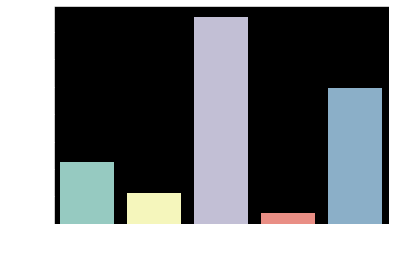

In [17]:
sns.countplot(df['stalk-root'])


In [18]:
df['stalk-root'].replace('?',np.nan,inplace=True)
df.isna().mean()

Class                       0.000000
cap-shape                   0.000000
cap-surface                 0.000000
cap-color                   0.000000
bruises                     0.000000
odor                        0.000000
gill-attachment             0.000000
gill-spacing                0.000000
gill-size                   0.000000
gill-color                  0.000000
stalk-shape                 0.000000
stalk-root                  0.305268
stalk-surface-above-ring    0.000000
stalk-surface-below-ring    0.000000
stalk-color-above-ring      0.000000
stalk-color-below-ring      0.000000
veil-type                   0.000000
veil-color                  0.000000
ring-number                 0.000000
ring-type                   0.000000
spore-print-color           0.000000
population                  0.000000
habitat                     0.000000
dtype: float64

In [19]:
missing_data_per = 2480/len(df)*100
print('missing data from the stalk-root column is {0:0.2f}%'.format(missing_data_per))

missing data from the stalk-root column is 30.53%


In [20]:
# Thus it is pretty safe to drop out the stalk-root column
df_cleaned = df.drop('stalk-root',1)

In [21]:
df_cleaned.sample(5)

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3650,e,f,y,e,t,n,f,c,b,u,...,s,g,p,p,w,o,p,n,y,d
1193,e,f,y,n,t,l,f,c,b,p,...,y,w,w,p,w,o,p,n,s,p
6479,p,x,s,n,f,s,f,c,n,b,...,k,p,p,p,w,o,e,w,v,p
1845,e,f,f,w,f,n,f,w,b,p,...,f,w,w,p,w,o,e,k,s,g
3263,e,x,y,g,t,n,f,c,b,u,...,s,w,p,p,w,o,p,n,y,d


In [22]:
# Count the unique values in the veil-type feature
df['veil-type'].value_counts()

p    8124
Name: veil-type, dtype: int64

In [23]:
# There is same instance all over the feature of the dataset
# Thus dropping the dataset would be an ideal choice
df_cleaned.drop('veil-type',1,inplace=True)

In [24]:
df_cleaned.head()

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [25]:
# Checking for the class balance in the dataset

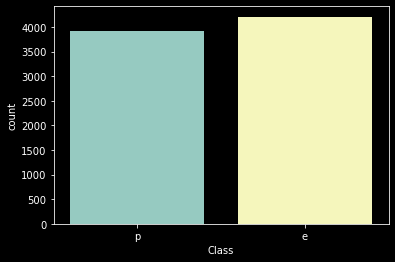

In [54]:
sns.countplot(df['Class'])

* There are 2 classes in the dependent variables and are well balanced

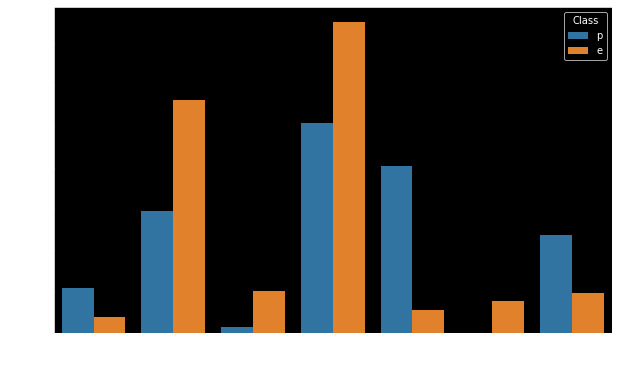

In [27]:
# Let's Check for most habitat
fig = plt.figure(figsize=(10,6))

fig.add_subplot(111)
sns.countplot(df.habitat,hue=df.Class,palette='tab10')


* Most of the mushrooms are grown in the woody habitat and then grassy habitat.
* Most of the poisonous mushrooms are found on the side of the path.
* Posionous Mushroom are found more than Edible mushrooms in cities and on leaves on planks and trees

___
## Encoding Categorical data
___

* We will use one label encoding to encode our complete dataset

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_cleaned.columns:
    df_cleaned[i] = le.fit_transform(df_cleaned[i])

In [29]:
df_cleaned.head()

,Class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [30]:
# check the correation ofthe dataset
df_cleaned.corr()['Class']

Class                       1.000000
cap-shape                   0.052951
cap-surface                 0.178446
cap-color                  -0.031384
bruises                    -0.501530
odor                       -0.093552
gill-attachment             0.129200
gill-spacing               -0.348387
gill-size                   0.540024
gill-color                 -0.530566
stalk-shape                -0.102019
stalk-surface-above-ring   -0.334593
stalk-surface-below-ring   -0.298801
stalk-color-above-ring     -0.154003
stalk-color-below-ring     -0.146730
veil-color                  0.145142
ring-number                -0.214366
ring-type                  -0.411771
spore-print-color           0.171961
population                  0.298686
habitat                     0.217179
Name: Class, dtype: float64

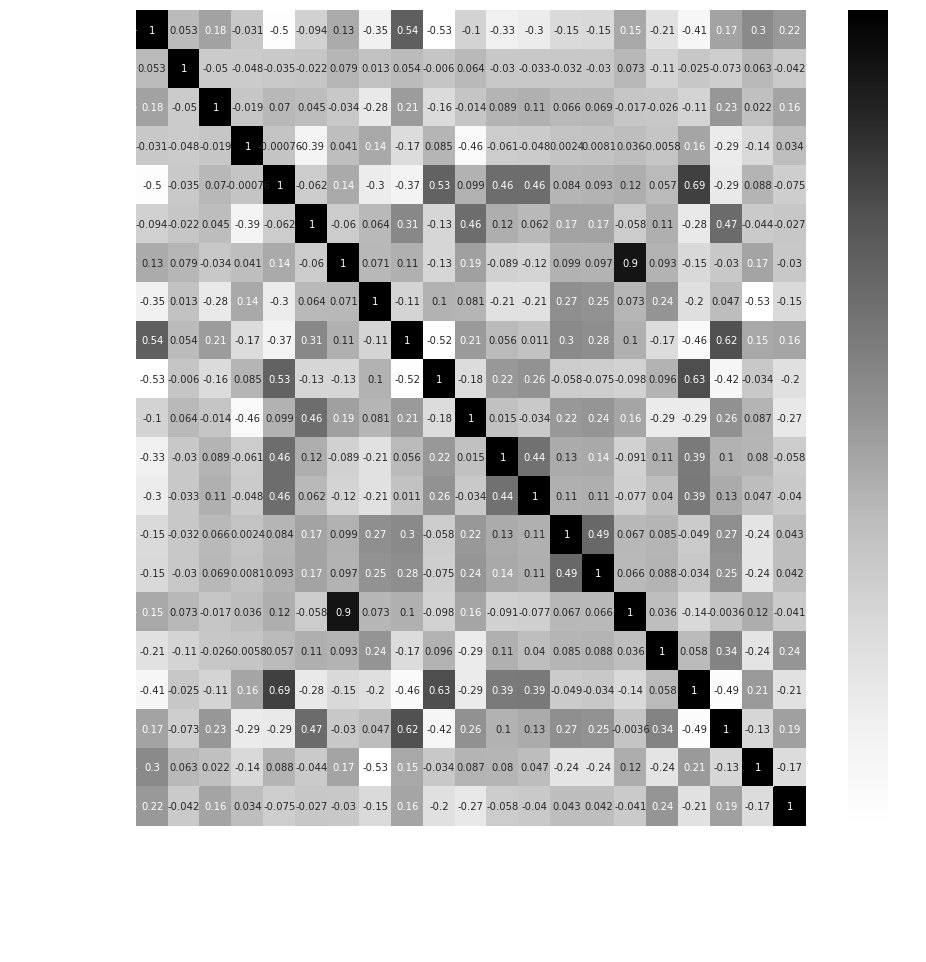

In [31]:
# the correaltion heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df_cleaned.corr(),cmap='Greys',annot=True)

* Let's split the data into X and y to perform categorical encoding

In [32]:
X = df_cleaned.drop('Class',1)
y = df_cleaned['Class']

In [33]:
X.shape,y.shape

((8124, 20), (8124,))

___
## Training the model
___

In [34]:
# Splitting the training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((5443, 20), (2681, 20), (5443,), (2681,))

In [35]:
# Stating with logistic regression model
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train,y_train.ravel())
logistic_model.score(X_test,y_test)

0.9459157030958597

In [36]:
# Let's try Support Vecotor Machines

In [37]:
# first we need to Scale the data For SVC
# Scaling the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()


X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [38]:
from sklearn.svm import SVC
svc_model = SVC()

svc_model.fit(X_train,y_train.ravel())
svc_model.score(X_test,y_test)

y_preds = svc_model.predict(X_test)

## Metrics And Evaluation

In [39]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

In [40]:
print(classification_report(y_test,svc_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1378
           1       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [41]:
print(confusion_matrix(y_test,svc_model.predict(X_test)))

[[1378    0]
 [   0 1303]]


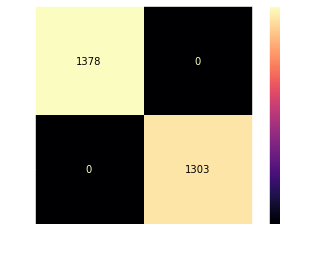

In [64]:
plot_confusion_matrix(svc_model,X_test,y_test,cmap='magma')

In [43]:
from sklearn.model_selection import cross_val_score
cross_val_score(svc_model,X_test,y_test,cv=10)

array([1.        , 1.        , 1.        , 1.        , 0.99626866,
       1.        , 1.        , 1.        , 1.        , 0.99626866])

In [44]:
# The support Vector Classifier is giving us a best result for the mushroom dataset on CV = 10

##PCA 

In [45]:
# PCA on the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=0.85)
pca_components = pca.fit_transform(X)

In [46]:
pca.explained_variance_ratio_

array([0.34098234, 0.16880936, 0.1236169 , 0.0682309 , 0.05959469,
       0.0508935 , 0.04424121])

In [47]:
pca.explained_variance_ratio_[:3].sum()

0.633408604304886

In [48]:
pca.explained_variance_ratio_[:2].sum()

0.5097917041221649

###Inference:
*  `the first 3 components account for roughly for 63 percent of the total variance in the dataset `which is good,
* and
* `the first 2 components account for roughly for 50 percent of the total variance in the datset `




### Plotting the PCA components

In [71]:
%matplotlib qt

# creating a figure
fig = plt.figure(figsize=(20,8))
# Creating color map 
my_cmap = plt.get_cmap('hsv') 

ax = fig.add_subplot(121,projection='3d')
pca_comp_x = pca_components[:,0]
pca_comp_y = pca_components[:,1]
pca_comp_z = pca_components[:,2]


sctt = ax.scatter(pca_comp_x,pca_comp_y,pca_comp_z,c = (pca_comp_x + pca_comp_y + pca_comp_z),cmap = 'magma',marker ='^') 

plt.title("PCA 3D scatter plot ") 
ax.set_xlabel('pca_x', fontweight ='bold')  
ax.set_ylabel('pca_y', fontweight ='bold')  
ax.set_zlabel('pca_y', fontweight ='bold') 
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5) 

fig.add_subplot(122)

y_dict = {0:'edible',1:'poisonous'}
sns.scatterplot(pca_comp_x,pca_comp_y,hue=y,palette='magma',alpha=0.7)
plt.title("PCA 2D scatter plot ") 
ax.set_xlabel('pca_x', fontweight ='bold')  
ax.set_ylabel('pca_y', fontweight ='bold')  
plt.legend(y_dict.values())